## Mapping Airbnb Data in Python

Here we will use Python to explore an Airbnb dataset for Chicago. We will create basic choropleth maps, and then we will move on to more complex ones with an emphasis on various color-filling mechanisms. 

### Isaac Kamber


In [7]:
import pandas as pd
import geopandas as gpd
#import libpysal.api as lp -- Could not download
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
#import contextily as ctx -- Weird issue installing because of gdal build 
import shapely.geometry as geom
%matplotlib inline

In [8]:
df = gpd.read_file('airbnb/airbnb_Chicago 2015.shp')

In [9]:
df.head

<bound method NDFrame.head of                  community     shape_area      shape_len  AREAID  response_r  \
0                  DOUGLAS  46004621.1581  31027.0545098      35   98.771429   
1                  OAKLAND  16913961.0408  19565.5061533      36   99.200000   
2              FULLER PARK  19916704.8692           None      37   68.000000   
3          GRAND BOULEVARD  48492503.1554  28196.8371573      38   94.037037   
4                  KENWOOD  29071741.9283  23325.1679062      39   92.542857   
5           LINCOLN SQUARE  71352328.2399  36624.6030848       4   90.009901   
6          WASHINGTON PARK  42373881.4842  28175.3160866      40  100.000000   
7                HYDE PARK  45105380.1732  29746.7082016      41   92.495049   
8                 WOODLAWN   57815179.512  46936.9592443      42   91.090909   
9              ROGERS PARK  51259902.4506  34052.3975757       1   95.825000   
10          JEFFERSON PARK  64868161.6818  44011.9571704      11   99.250000   
11        

In [10]:
import seaborn as sbn

In [11]:
df['price_pp'].fillna((df['price_pp'].mean()), inplace=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


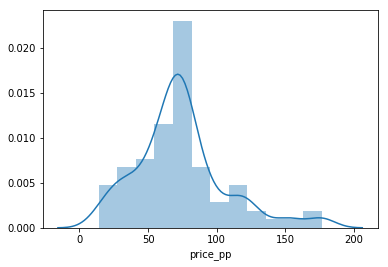

In [12]:
sbn.distplot(df['price_pp'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


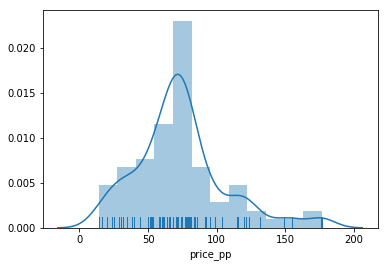

In [13]:
sbn.distplot(df['price_pp'], rug=True)

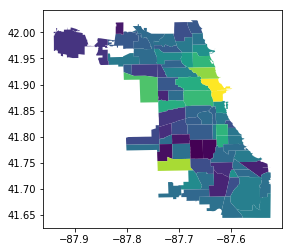

In [14]:
df.plot(column='price_pp')

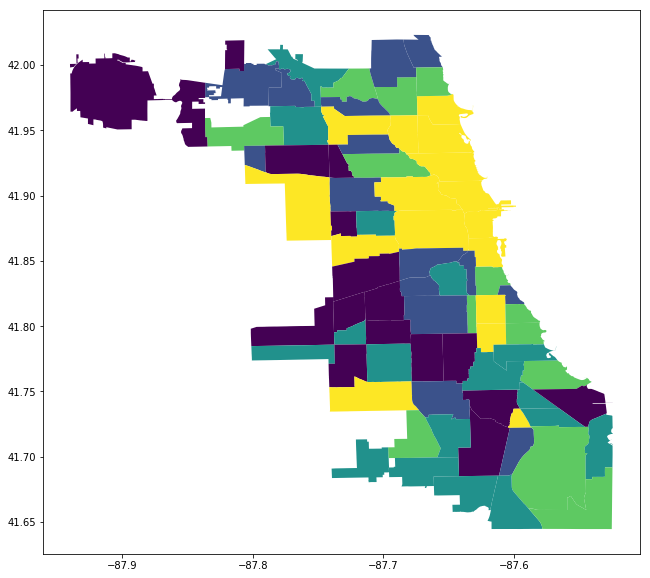

In [15]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

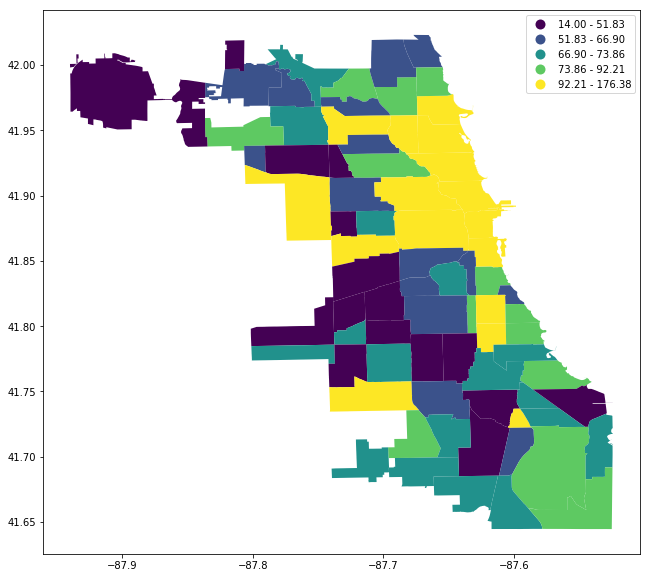

In [16]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles',  legend=True, ax=ax)

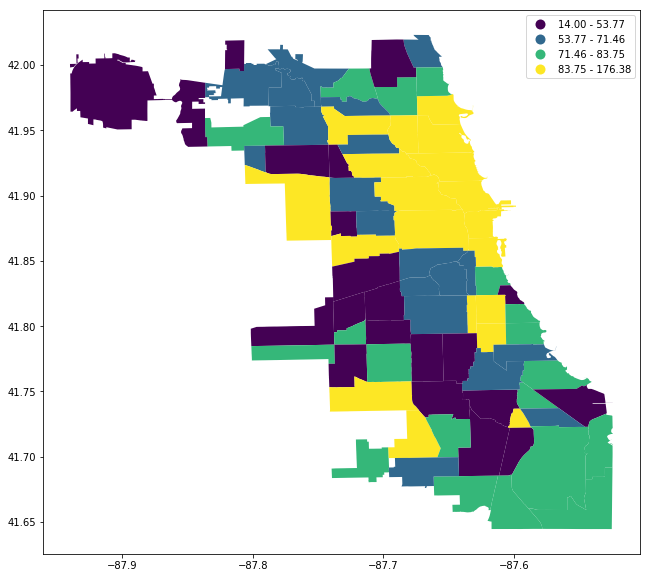

In [17]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax)

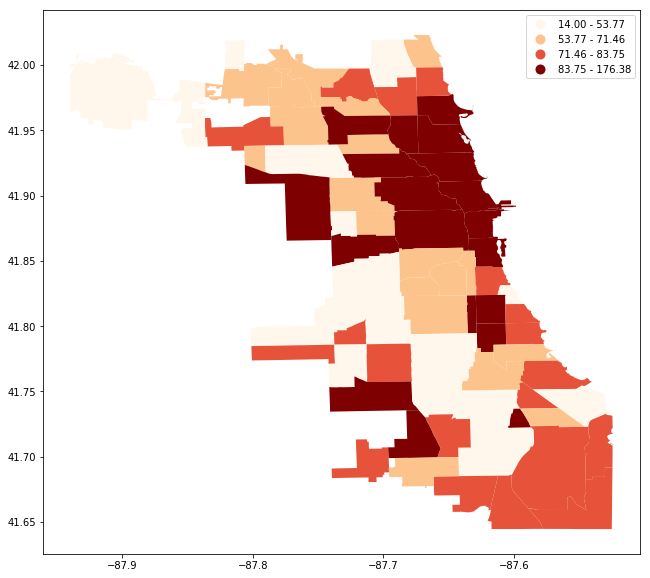

In [18]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap='OrRd')

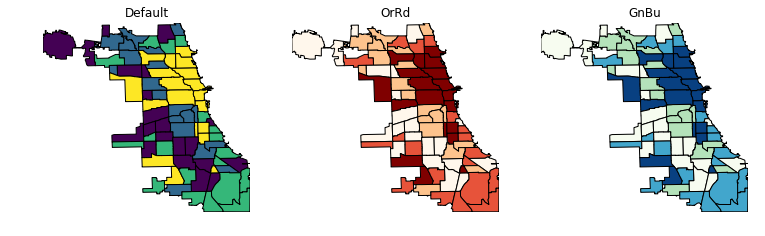

In [19]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

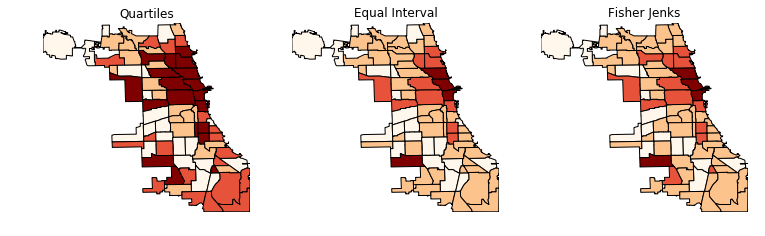

In [20]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='OrRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='OrRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [21]:
import mapclassify as mc

In [22]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

In [23]:
y = df['price_pp']
ea5 = mc.Equal_Interval(y, k=5)

In [24]:
ea5

              Equal Interval              
 
 Lower            Upper              Count
          x[i] <=  46.475               14
 46.475 < x[i] <=  78.950               38
 78.950 < x[i] <= 111.425               14
111.425 < x[i] <= 143.900                7
143.900 < x[i] <= 176.376                4

In [25]:
ea5.yb

array([1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 4, 4, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 0])

In [26]:
q5 = mc.Quantiles(y, k=5)
q5

                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=  51.833               16
 51.833 < x[i] <=  66.897               15
 66.897 < x[i] <=  73.864               17
 73.864 < x[i] <=  92.206               13
 92.206 < x[i] <= 176.376               16

In [27]:
q5.yb

array([3, 1, 3, 4, 3, 3, 4, 3, 2, 1, 1, 2, 3, 1, 2, 4, 3, 1, 0, 1, 0, 1,
       3, 1, 4, 4, 0, 2, 4, 4, 4, 0, 1, 4, 1, 1, 4, 4, 3, 0, 2, 0, 4, 2,
       0, 4, 1, 3, 2, 2, 2, 3, 0, 0, 0, 1, 4, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 4, 4, 1, 3, 2, 2, 2, 0, 3, 0])

In [28]:
y.shape

(77,)

In [29]:
np.unique(y).shape

(67,)

In [47]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[598.0520588840582, 539.643737884058, 1096.390616884058, 488.9713821014492]

In [30]:
ht = mc.HeadTail_Breaks(y)
ht

             HeadTail_Breaks              
 
 Lower            Upper              Count
          x[i] <=  73.864               48
 73.864 < x[i] <=  98.160               16
 98.160 < x[i] <= 130.727                8
130.727 < x[i] <= 157.566                3
157.566 < x[i] <= 176.254                1
176.254 < x[i] <= 176.376                1

In [31]:
std = mc.Std_Mean(y)
std

                 Std_Mean                 
 
 Lower            Upper              Count
          x[i] <=   7.250                0
  7.250 < x[i] <=  40.557               12
 40.557 < x[i] <= 107.170               54
107.170 < x[i] <= 140.477                7
140.477 < x[i] <= 176.376                4

In [32]:
bp = mc.Box_Plot(y)
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

In [33]:
bp

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

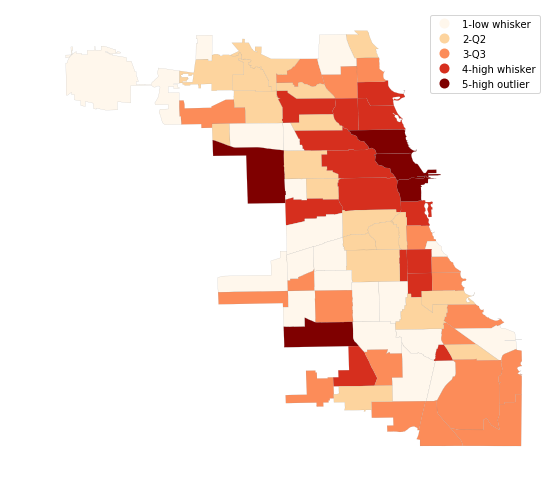

In [49]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

## Custom Version of Final Map
Here, I adapt the final map from the geopython visualization tutorial to further explore the parameters and arguments that can be modified using matplotlib. I change the color palette, the line width, and add a title in an effort to show how the maps can be customized beyond the scope of the tutorial using no additional modules. Then, for fun, we use a Wes Anderson color palette from *The Grand Budapest Hotel* to further demonstrate how these basic capabilities can be expanded. 

Note: This type of color palette may not be the best to reprsent the data given, but it is given as proof of concept. 

In [55]:
import palettable as pltt

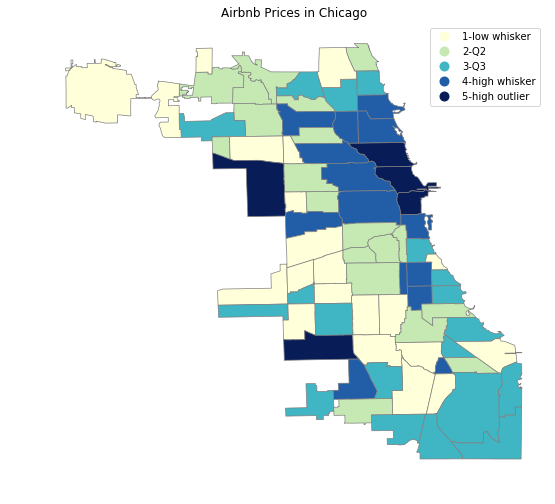

In [77]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap='YlGnBu', linewidth=0.7, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.title("Airbnb Prices in Chicago")
plt.show()

In [95]:
from palettable.wesanderson import GrandBudapest1_4

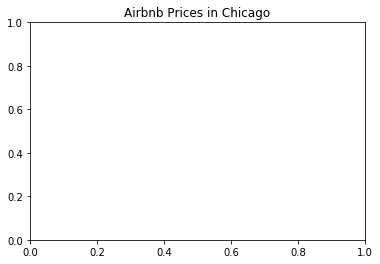

In [117]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]
ax.axis('Off')
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap = GrandBudapest1_4.mpl_colormap, linewidth=0.7, ax=ax,\
                                      edgecolor='grey', legend=True)

plt.title("Airbnb Prices in Chicago")
plt.show()

## Plotting Average Rating 

Here, we will explore the average rating data included in the Airbnb dataset. A choropleth map reveals that locations on the North Side generally receive higher ratings than those on the South Side, however a more in-depth exploration of this data in conjunction with the other attributes included in the dataset would be interesting to see. As with before, we add a title, change the line width, and change the color scheme. We also hide the axes in this map and change the edgecolor to black from grey. Thus, in addition to exploring more aspects of the data, we continue to see more ways that the maps can be modified 

In [99]:
df['rev_rating'].fillna((df['rev_rating'].mean()), inplace=True)

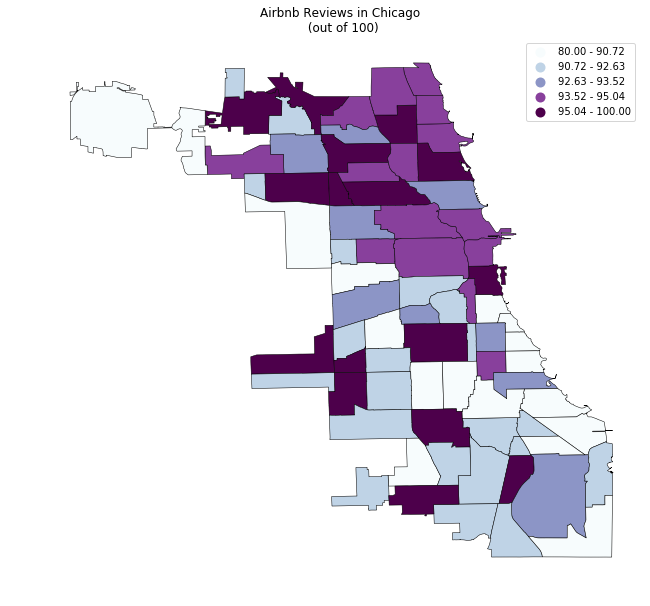

In [126]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

df.plot(column='rev_rating', scheme='Quantiles', k=5, legend=True, ax=ax, cmap = 'BuPu', linewidth=0.5, edgecolor = "Black")

plt.axis('Off')

plt.title("Airbnb Reviews in Chicago \n (out of 100)")
plt.show()